In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
sns.set_style('whitegrid')
from scipy import stats
from bs4 import BeautifulSoup
import requests

def sql(query):
    '''
    Generates a Pandas Dataframe using SQL syntax.
    
    Parameters
    ----------
        arg_1 : SQL query(String)
    
    Returns
    -------
        Pandas DataFrame
    '''
    
    return ps.sqldf(query)


def ecdf(data):
    '''
    Compute ECDF for a one-dimensional array of measurements.
    
    Parameters
    ----------
        args_1 : 1D NumyPy Array or 1D Pandas Series
    
    Returns
    -------
        x, y variables for plotting ECDF
    
    '''
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

def t_test(df1, df2, confidence_level = 0.05):
    '''
    Performing a Student's T-test.
    
    Parameters
    ----------
        args_1 : df1(Type: Pandas DataFrame)
        args_2 : df2(Type: Pandas DataFrame)
        args_3 : confidence_level(Type: Float, Default: 0.05)
    '''
    
    print("***Performing a Student's T-test***")
    
    statistic , p_value = stats.ttest_ind(df1, df2)
    print('\nThe P-Value for the T-test is: {:.5f}'.format(p_value[1]))
    if p_value[1] < confidence_level:
        print('Rejecting the Null Hypothesis - The Difference in Mean is Statistically Siginificant')
    else:
        print('Unable to Reject the Null Hypothesis - The Difference in Mean is NOT Statistically Siginificant')

In [2]:
# Loading the data
yearly_deaths = pd.read_csv('yearly_deaths_by_clinic.csv')
yearly_deaths

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


# Rate of death in each clinic

Calculating the number of childbirths & deaths for each clinic.

In [3]:
# Summing up the Number of Childbirths per clinic
births_by_clinic = pd.DataFrame(yearly_deaths.groupby('clinic')['births'].sum()).rename(columns = { 'births' :'Number of Childbirths'})
births_by_clinic

,Number of Childbirths
clinic,
clinic 1,20042
clinic 2,17791


In [4]:
# Summing up the Number of Deaths per clinic
deaths_by_clinic = pd.DataFrame(yearly_deaths.groupby('clinic')['deaths'].sum()).rename(columns = {'deaths':'Number of Deaths'})
deaths_by_clinic

,Number of Deaths
clinic,
clinic 1,1989
clinic 2,691


Calculating the rate of death for each clinic.

In [5]:
# Calculating the proporations of death in clinic 1
clinic1_proportions = round(deaths_by_clinic.iloc[0,0] / births_by_clinic.iloc[0,0],2)
print('Rate of Death in Clinic 1 is: {}'.format(clinic1_proportions))

Rate of Death in Clinic 1 is: 0.1


In [6]:
# Calculating the proporations of death in clinic 1
clinic2_proportions = round(deaths_by_clinic.iloc[1,0] / births_by_clinic.iloc[1,0],2)
print('Rate of Death in Clinic 2 is: {}'.format(clinic2_proportions))

Rate of Death in Clinic 2 is: 0.04


# Cumulative Sum of Death Count from 1841 to 1846

In [7]:
# Using SQL syntax to Create a Dataframe for each of the clinics
query1 = '''SELECT year, deaths
            From yearly_deaths
            WHERE clinic = "clinic 1"
            '''
query2 = '''SELECT year, deaths
            From yearly_deaths
            WHERE clinic = "clinic 2"
            '''
clinic1_df = sql(query1)
clinic2_df = sql(query2)

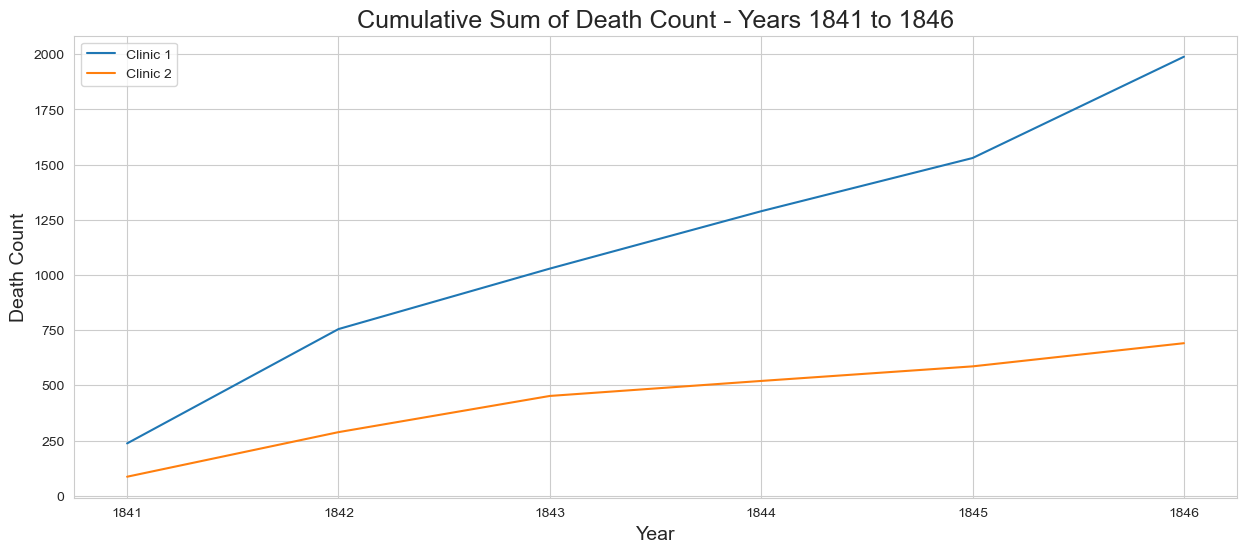

In [8]:
# Plotting a Cumulative Sum of all the deaths throughout the years 1841 to 1846
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(clinic1_df['year'], clinic1_df['deaths'].cumsum(), label = 'Clinic 1')
ax.plot(clinic2_df['year'], clinic2_df['deaths'].cumsum(), label = 'Clinic 2')
plt.xlabel('Year', size = 14)
plt.ylabel('Death Count', size = 14)
plt.title('Cumulative Sum of Death Count - Years 1841 to 1846', size = 18)
plt.legend()
plt.show()

In [9]:
# Generating x and y variables to plot the Estimated Cumulative Distribution Function(ecdf)
x_clinic1, y_clinic1 = ecdf(clinic1_df.deaths)
x_clinic2, y_clinic2 = ecdf(clinic2_df.deaths)

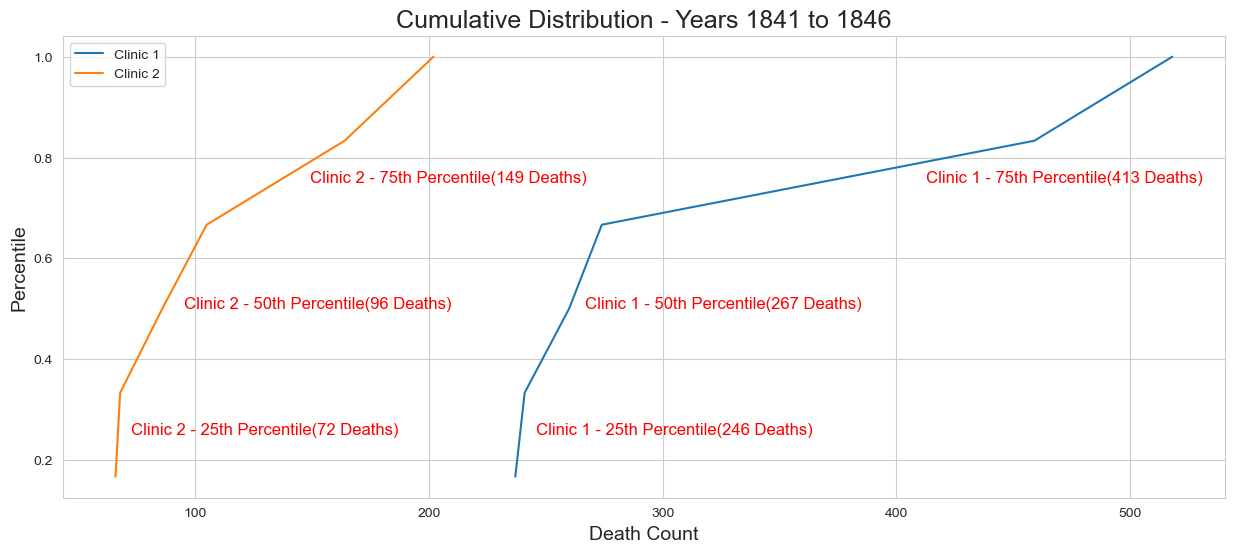

In [10]:
# Plotting the ecdf and annotating the 25th 50th and the 75th percentile of death count per clinic
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(x_clinic1, y_clinic1, label = 'Clinic 1')
ax.plot(x_clinic2, y_clinic2, label = 'Clinic 2')
plt.xlabel('Death Count', size = 14)
plt.ylabel('Percentile', size = 14)
plt.title('Cumulative Distribution - Years 1841 to 1846', size = 18)
plt.annotate('Clinic 1 - 25th Percentile({:.0f} Deaths)'.format(np.quantile(clinic1_df.deaths, 0.25)), xy = (np.quantile(clinic1_df.deaths,0.25),0.25), color = 'r', size = 12)
plt.annotate('Clinic 2 - 25th Percentile({:.0f} Deaths)'.format(np.quantile(clinic2_df.deaths, 0.25)), xy = (np.quantile(clinic2_df.deaths, 0.25), 0.25), color = 'r', size = 12)
plt.annotate('Clinic 1 - 50th Percentile({:.0f} Deaths)'.format(np.median(clinic1_df.deaths)), xy = (np.median(clinic1_df.deaths),0.5), color = 'r', size = 12)
plt.annotate('Clinic 2 - 50th Percentile({:.0f} Deaths)'.format(np.median(clinic2_df.deaths)), xy = (np.median(clinic2_df.deaths), 0.5), color = 'r', size = 12)
plt.annotate('Clinic 1 - 75th Percentile({:.0f} Deaths)'.format(np.quantile(clinic1_df.deaths,0.75)), xy = (np.quantile(clinic1_df.deaths,0.75),0.75), color = 'r', size = 12)
plt.annotate('Clinic 2 - 75th Percentile({:.0f} Deaths)'.format(np.quantile(clinic2_df.deaths,0.75)), xy = (np.quantile(clinic2_df.deaths,0.75), 0.75), color = 'r', size = 12)
plt.legend()
plt.show()

In [11]:
#Let’s import the monthly data of Clinic 1 from Wikipedia to see if the handwashing had any effect.

# Web Scraping from Wiki — Monthly Data

In [12]:
# Setting the required URL address 
wiki_url = 'https://en.wikipedia.org/wiki/Historical_mortality_rates_of_puerperal_fever'
table_class="wikitable sortable jquery-tablesorter"

# Sending to Wikipedia a GET request
response = requests.get(wiki_url)

# Recieving the response code from Wikipedia
status_code = response.status_code

# Checking if Access is Authorized
if status_code == 200:
    print('Access Authorized')
else:
    print('No Access')
print()

Access Authorized



In [13]:
# Parsing the response in an HTML format
soup = BeautifulSoup(response.text, 'html.parser')

# Finding the required table from the Wikipedia page
table=soup.find('table',{'class':"wikitable"})

In [14]:
# Reading table data
clinic1_monthly_df = pd.read_html(str(table))

# Converting list to dataframe
clinic1_monthly_df = pd.DataFrame(clinic1_monthly_df[0]).drop(columns = ['Year', 'Notes'], axis = 1)
clinic1_monthly_df.head(12)

,Month,Births,Deaths,Rate (%)
0,January 1841,254,37,14.6
1,February 1841,239,18,7.5
2,March 1841,277,12,4.3
3,April 1841,255,4,1.6
4,May 1841,255,2,0.8
5,June 1841,200,10,5.0
6,July 1841,190,16,8.4
7,August 1841,222,3,1.4
8,September 1841,213,4,1.9
9,October 1841,236,26,11.0


Analyzing data before and after the handwashing policy

In [15]:
# Checking the feature's data type
print(clinic1_monthly_df.info())

# Checking for missing values
clinic1_monthly_df.isna().sum()

# Sorting the Birth feature
clinic1_monthly_df.Births.sort_values(ascending = False)

# Finding the index to drop
index_to_drop = clinic1_monthly_df[clinic1_monthly_df.Births.str.find('na') == 0].index[0]
index_to_drop

# Dropping the index
clinic1_monthly_df.drop(index=index_to_drop, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     99 non-null     object
 1   Births    99 non-null     object
 2   Deaths    99 non-null     object
 3   Rate (%)  99 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB
None


In [17]:
# Changing each column to a more appropriate data type
clinic1_monthly_df['Births'] = clinic1_monthly_df.Births.astype('int')
clinic1_monthly_df['Deaths'] = clinic1_monthly_df.Deaths.astype('int')
clinic1_monthly_df['Rate (%)'] = clinic1_monthly_df['Rate (%)'].astype('float')
clinic1_monthly_df['Month'] = pd.to_datetime(clinic1_monthly_df.Month)

# Checking the new data types
clinic1_monthly_df.dtypes

# Setting the Month datetime column as the index
clinic1_monthly_df = clinic1_monthly_df.set_index('Month')

In [18]:
# New Dataframe look like this
clinic1_monthly_df

,Births,Deaths,Rate (%)
Month,,,
1841-01-01,254,37,14.6
1841-02-01,239,18,7.5
1841-03-01,277,12,4.3
1841-04-01,255,4,1.6
1841-05-01,255,2,0.8
...,...,...,...
1848-11-01,310,9,2.9
1848-12-01,373,5,1.3
1849-01-01,403,9,2.2


# Plotting the effects of the handwashing policy.

According to Wiki, the handwashing policy started around: Mid 1847


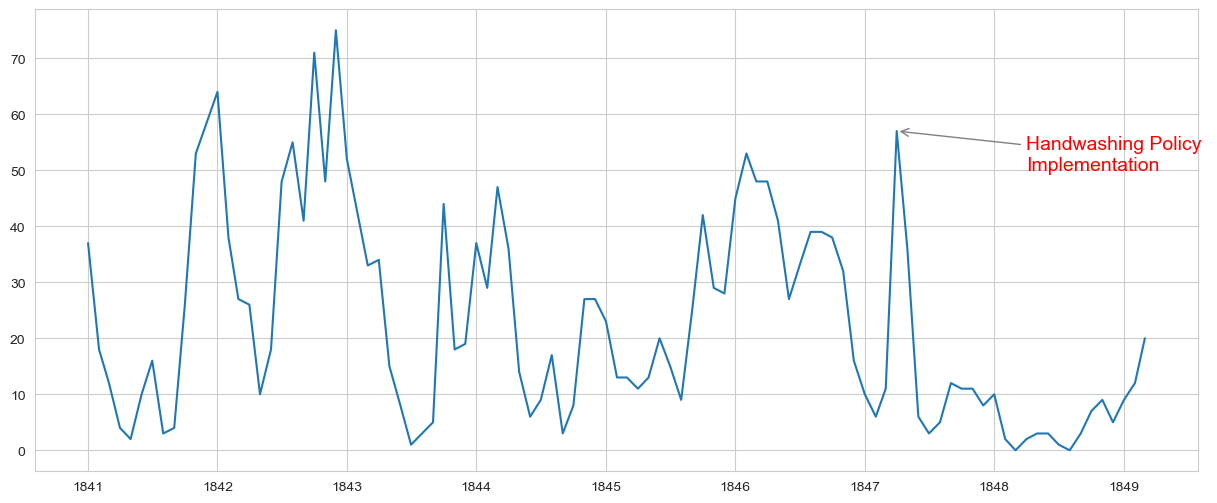

In [19]:
number_of_deaths_pre_policy = clinic1_monthly_df[clinic1_monthly_df.index == '1847-04-01'].Deaths[0]

fig, ax = plt.subplots(figsize = (15,6))
ax.plot(clinic1_monthly_df.index, clinic1_monthly_df.Deaths)
plt.annotate('Handwashing Policy \nImplementation',xy = (pd.Timestamp('1847-04-01'),number_of_deaths_pre_policy), color = 'r',
                size = 14, arrowprops = {'arrowstyle':'->', 'color':'gray'}, xytext = (pd.Timestamp('1848-04-01'),50))

plt.show()

Dividing the data to before and after the handwashing policy.


In [20]:
pre_policy_df = clinic1_monthly_df[clinic1_monthly_df.index < '1847-05-01']
pre_policy_df.tail()

,Births,Deaths,Rate (%)
Month,,,
1846-12-01,298,16,5.4
1847-01-01,311,10,3.2
1847-02-01,312,6,1.9
1847-03-01,305,11,3.6
1847-04-01,312,57,18.3


In [21]:
after_policy_df = clinic1_monthly_df[clinic1_monthly_df.index >= '1847-05-01']
after_policy_df.head()

,Births,Deaths,Rate (%)
Month,,,
1847-05-01,294,36,12.2
1847-06-01,268,6,2.2
1847-07-01,250,3,1.2
1847-08-01,264,5,1.9
1847-09-01,262,12,4.6


# Analyzing the differences.

Pre-Handwashing Policy

In [41]:
pre_policy_df.describe()

,Births,Deaths,Rate (%)
count,75.000000,75.000000,75.000000
mean,257.026667,26.986667,10.481333
std,34.241974,18.026627,7.119989
min,190.000000,1.000000,0.500000
25%,236.500000,11.500000,4.400000
50%,254.000000,26.000000,10.500000
75%,278.500000,40.000000,15.100000
max,336.000000,75.000000,31.400000


Post-Handwashing Policy

In [23]:
after_policy_df.describe()

,Births,Deaths,Rate (%)
count,23.000000,23.000000,23.000000
mean,299.521739,7.739130,2.547826
std,47.997035,7.846351,2.573443
min,246.000000,0.000000,0.000000
25%,266.000000,3.000000,1.000000
50%,283.000000,6.000000,2.200000
75%,311.000000,10.500000,3.300000
max,406.000000,36.000000,12.200000


The average number of deaths post policy is about 3 times as lower!!!

Now, Let’s check out the distribution of Death counts pre and post policy

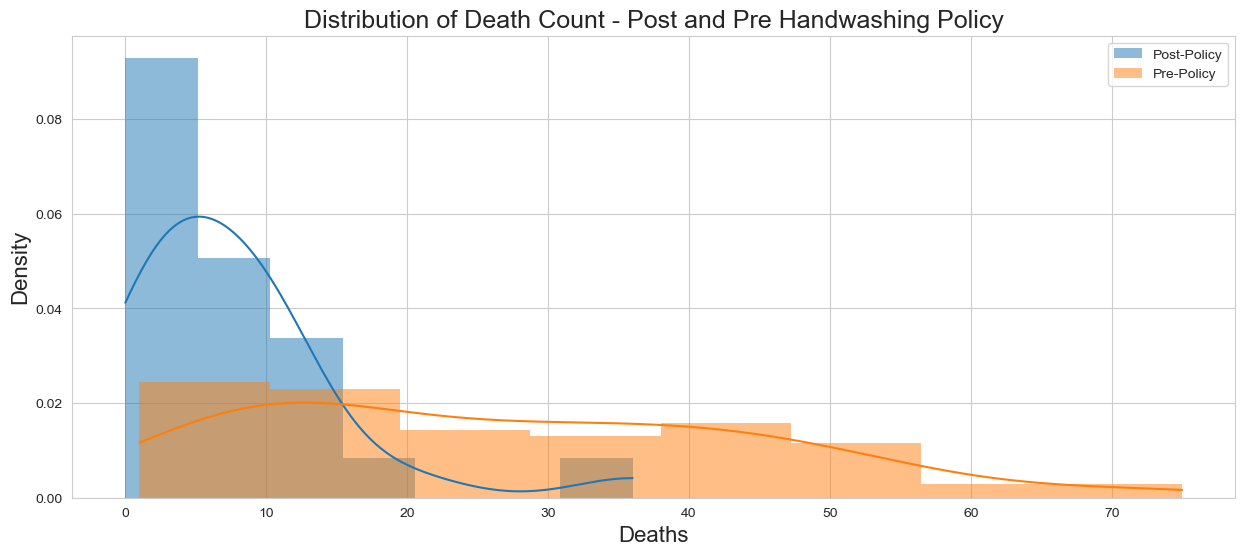

In [34]:
# Checking out the Kernel Density Estimation of each Dataframe
fig, ax = plt.subplots(figsize = (15,6))
ax = sns.histplot(data = after_policy_df, x = after_policy_df.Deaths, kde=True, stat="density", linewidth=0, label = 'Post-Policy')
ax = sns.histplot(data = pre_policy_df, x = pre_policy_df.Deaths, kde=True, stat="density", linewidth=0, label = 'Pre-Policy')
plt.xlabel('Deaths', size = 16)
plt.ylabel('Density', size = 16)
plt.title('Distribution of Death Count - Post and Pre Handwashing Policy', size = 18)
ax.legend()
plt.show()

let’s perform a hypothesis test to see if the difference is significant.

Let's use Bootstrap Analysis of the data this time.

In [35]:
# Creating 10000 samples of the pre and post policy data
pre_policy_bootstrap_sample = np.random.choice(pre_policy_df.Deaths, size = 10000)
post_policy_bootstrap_sample = np.random.choice(after_policy_df.Deaths, size = 10000)

# Calculating the difference in mean
mean_diff = round(np.mean(post_policy_bootstrap_sample) - np.mean(pre_policy_bootstrap_sample),5)
mean_diff

-19.2857

In [74]:
# So it looks like the policy has lowered the mean number of mortality by about 19 deaths per month!!
# Let’s calculate a 95% Confidence interval to see the full extent of the benefits of the handwashing policy. 

In [36]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = np.random.choice(pre_policy_df.Deaths, size=10000)
    boot_after = np.random.choice(after_policy_df.Deaths, size=10000)
    boot_mean_diff.append(np.mean(boot_after) - np.mean(boot_before))

# Calculate the mean and confidence interval
mean_diff = np.mean(boot_mean_diff)
conf_interval = np.percentile(boot_mean_diff, [2.5, 97.5])

print("Confidence Interval (0.025, 0.975):", conf_interval)

Confidence Interval (0.025, 0.975): [-19.6324325 -18.86839  ]


In other words, I can say with 95% confidence that, even if the data was slightly different (but of the same distribution), after the handwashing policy, the average number of deaths would decrease by up to 18.87 to 19.63 per month!!!
And it’s all thanks to Dr. Semmelweis and his Discovery of Handwashing.